##To Do:


1.   Pull pistachio dataset from Kaggle
2.   Perform EDA on dataset
3.   Preprocess and standarize data 
3.   Predict on machine learning classification models
7.   Observe and analyze the findings   






# **1. Install and Import Dependencies** 

##installing openpyxl


*   openpyxl is a Python library to read/write Excel files



In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pistachio_16_Features_Dataset.xlsx")

## Here, this is the overview of our 16 feature dataset for pistachios. We will be classifying two pistachios


1.   Kirmizi Pistachio - 1,232 rows
2.   Siit Pistachio - 916 rows



In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

## Features of Pistachio data-set


*   **AREA** : Area of pistachio bean
*   **PERIMETER** : Bean circumference is defined as the length of its border.
*   **MAJOR_AXIS** : The distance between the ends of the longest line that can be drawn from a bean 
*   **MINOR_AXIS** : The longest line that can be drawn from the bean while standing perpendicular to the main axis 
*   **ECCENTRICITY** : Eccentricity of the ellipse having the same moments as the region
*   **EQDIASQ** : Equivalent diameter squared of a Pistachio
*   **SOLIDITY** : Firmness of a Pistachio
*   **CONVEX_AREA** : Number of pixels in the smallest convex polygon that can contain the area of a bean grain
*   **EXTENT** : Ratio of area of bean(A) to area of a bounding rectangle (Ab) 
*   **ASPECT_RATIO** : Ratio of major and minor axis 
*   **ROUNDNESS** : Roundness of pistachio bean
*   **COMPACTNESS**: Compactness of pistachio bean
*   **SHAPEFACTOR_1**: Ratio of major axis to Area
*   **SHAPEFACTOR_2**: Ratio of minor axis to Area
*   **SHAPEFACTOR_3**: Ratio of Area to the sqare of half of the length of major axis 
*   **SHAPEFACTOR_4**: Ratio of Area to the product of half of the length of major and minor axis 
*   **Class** : Kirmizi or Siit Pistachio






# **2. Exploring our dataset (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

## Checking dataset for NULL values

In [ ]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

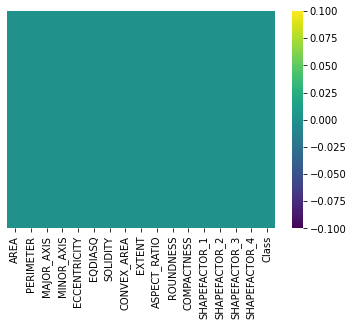

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [ ]:
df.describe(include=["object"])

,Class
count,2148
unique,2
top,Kirmizi_Pistachio
freq,1232


In [ ]:
df["Class"].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

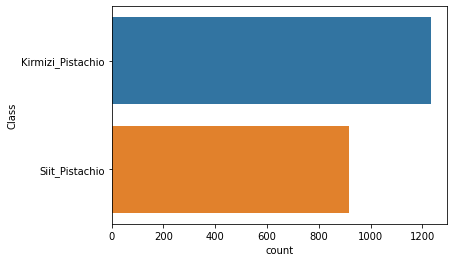

In [ ]:
sns.countplot(data=df,y="Class")
plt.show()

## The percentage of our data set being Kirmizi Pistachio is: **57.36%**
## The percentage of our data set being Siit Pistachio is: **42.64%**

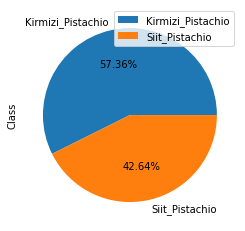

In [ ]:
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.legend(df["Class"].unique())
plt.show()

## Convering our categorical values to numeric by using OrdinalEncoder, which encodes categorical features as an integer array

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Class"]=oe.fit_transform(df[["Class"]])

In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,0.0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,0.0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,0.0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,0.0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,0.0


In [ ]:
oe.categories_

[array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 285.4 KB


In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239,0.426443
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840,0.494675
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,0.000000
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000,0.000000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100,0.000000
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300,1.000000
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000,1.000000


## Checking the skewness of all the 16 feautres in the dataset

In [ ]:
from scipy.stats import skew

AREA
Skewness: -0.2725996690363421


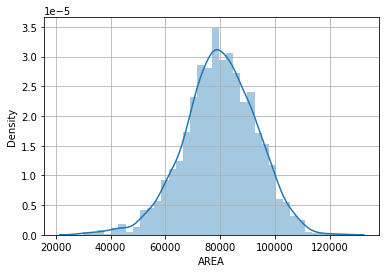

PERIMETER
Skewness: 1.3418407803468597


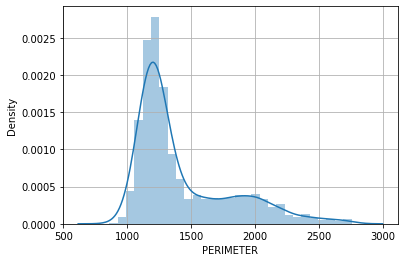

MAJOR_AXIS
Skewness: -0.4742455416356089


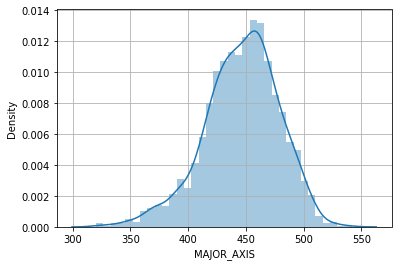

MINOR_AXIS
Skewness: 0.1491271563265608


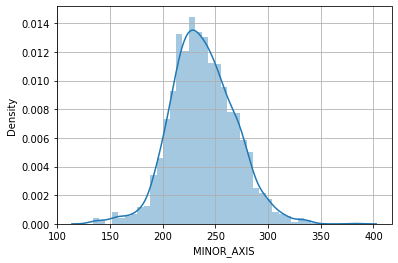

ECCENTRICITY
Skewness: -1.4551064878125315


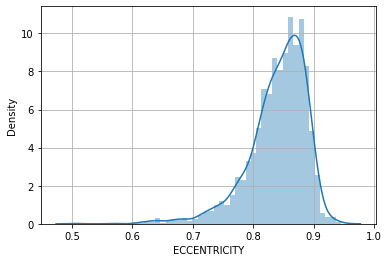

EQDIASQ
Skewness: -0.6159177765587933


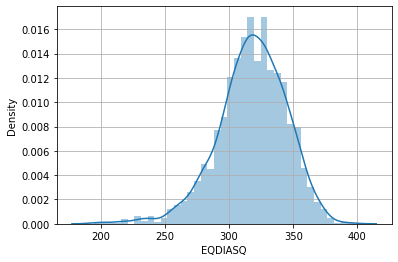

SOLIDITY
Skewness: -1.8865281329301278


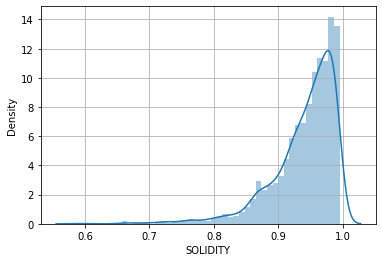

CONVEX_AREA
Skewness: -0.1785442510846831


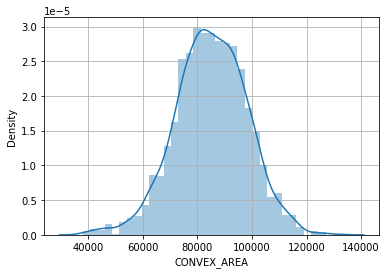

EXTENT
Skewness: -1.1495287458130574


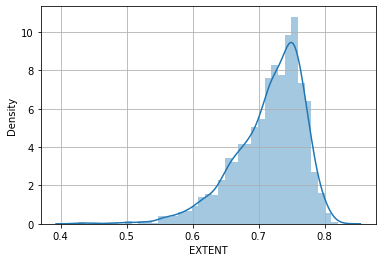

ASPECT_RATIO
Skewness: 0.19285188694843766


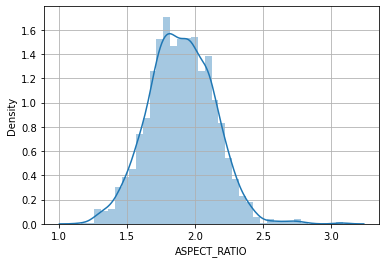

ROUNDNESS
Skewness: -0.5479905956440515


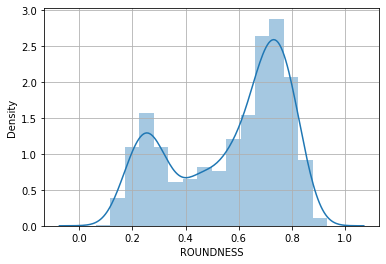

COMPACTNESS
Skewness: 0.16337731439223407


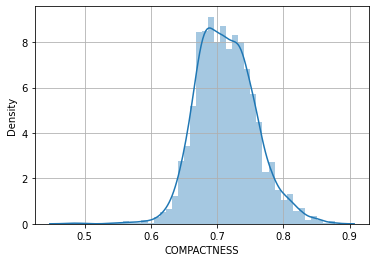

SHAPEFACTOR_1
Skewness: 1.859890260146182


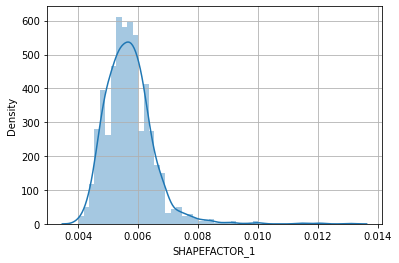

SHAPEFACTOR_2
Skewness: 1.8888293879332625


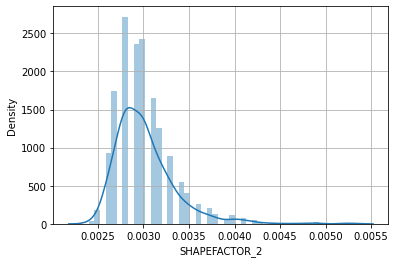

SHAPEFACTOR_3
Skewness: 0.42092528419127784


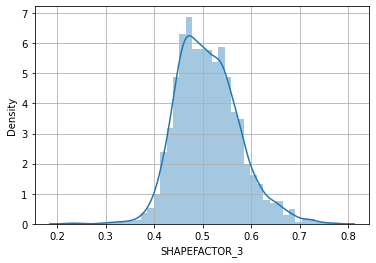

SHAPEFACTOR_4
Skewness: -2.64480607832139


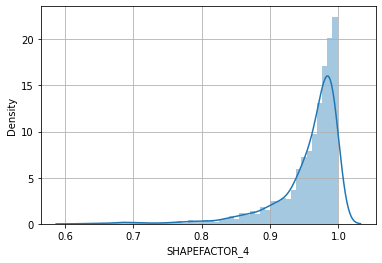

Class
Skewness: 0.2974637111402974


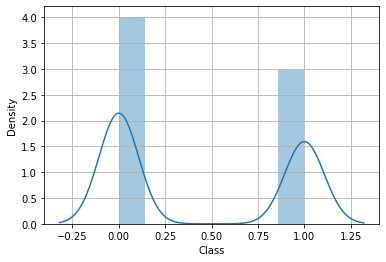

In [ ]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

## Checking for the correlation in the features, finding the pairwise correlation of all columns in the dataframe

In [ ]:
df.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
AREA,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,-0.892493,-0.652205,0.545091,0.297043,0.589226
PERIMETER,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,-0.081031,0.279590,0.047527,-0.631700,0.145290
MAJOR_AXIS,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,-0.391310,-0.796526,-0.208956,0.201741,0.136845
MINOR_AXIS,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,-0.851167,-0.087657,0.771658,-0.181450,0.668126
ECCENTRICITY,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,0.580983,-0.394392,-0.855222,0.325602,-0.546759
EQDIASQ,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,-0.906893,-0.665368,0.541747,0.302469,0.577300
SOLIDITY,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,-0.380619,-0.727156,0.215860,0.949501,0.125347
CONVEX_AREA,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,-0.834649,-0.447161,0.511311,-0.017052,0.584618
EXTENT,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,-0.369237,-0.510576,0.245638,0.650896,0.100200
ASPECT_RATIO,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,0.677735,-0.315574,-0.892523,0.250587,-0.581469


In [ ]:
df.corr()["Class"].sort_values()

SHAPEFACTOR_1   -0.615513
ASPECT_RATIO    -0.581469
ECCENTRICITY    -0.546759
SHAPEFACTOR_2   -0.126188
SHAPEFACTOR_4    0.063084
EXTENT           0.100200
ROUNDNESS        0.105768
SOLIDITY         0.125347
MAJOR_AXIS       0.136845
PERIMETER        0.145290
EQDIASQ          0.577300
CONVEX_AREA      0.584618
AREA             0.589226
COMPACTNESS      0.624939
SHAPEFACTOR_3    0.626304
MINOR_AXIS       0.668126
Class            1.000000
Name: Class, dtype: float64

## Heatmap of pairwise correlation of 16 features against 'class'

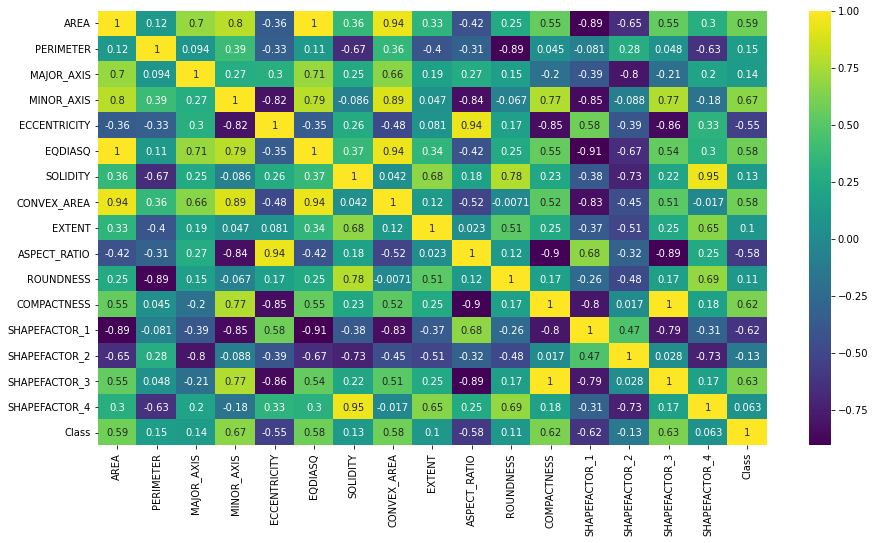

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [ ]:
x=df.iloc[ : , :-1]
x.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833


In [ ]:
y=df.iloc[ : ,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

## Standardizing our data to normalize the 16 features

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# **3. ML algorithms and model metrics:**


*    **KNN** The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
*    **Logistic Regression** Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables.
*    **Naive Bayes** based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
*    **Decision Trees** is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility
*    **Random Forests** is a meta estimator that fits a number of classifying decision trees on various subsamples of the dataset
*    **Support Vector Classifier (SVM)**  finds a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points
*    **Voting Classifier** A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
*    **Boosting** Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors
*    **Neural Network - Sequential** The main purpose of a neural network is to try to find the relationship between features in a data set., and it consists of a set of algorithms that mimic the work of the human brain




# **3.1 KNN**


## For this supervised classification problem the first algorithm I will be implementing will be K-nearest neighbours(KNN).
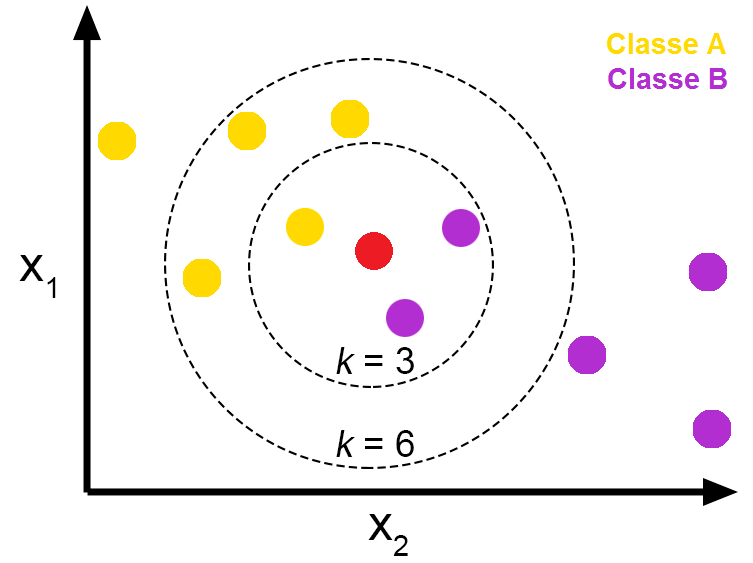

##**The KNN Algorithm:**
*   Load the data
*   Initialize K to your chosen number of neighbors
*   For each example in the data
> Calculate the distance between the query example and the current example from the data.
> Add the distance and the index of the example to an ordered collection
*   Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
*   Pick the first K entries from the sorted collection
*   Get the labels of the selected K entries
*   If regression, return the mean of the K labels
*   If classification, return the mode of the K labels

## **Assumptions**

*   The primary assumption that a KNN model makes is that data points/instances which exist in close proximity to each other are highly similar
*   Curse of dimentionality

## **Choosing the right value for K**

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before

###Here are some things to keep in mind:

*   As we decrease the value of K to 1, our predictions become less stable
*   Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point)
*   In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.








In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.8496124031007752

## **Classification report and confusion matrix**
**Classification report :** It is report that consists of the following metrics
1.   Precision : Percentage of correct positive predictions relative to total positive predictions
2.   Recall : Percentage of correct positive predictions relative to total actual positives.
1.   F1-Score : A weighted harmonic mean of precision and recall. The closer to 1, the better the model
> F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
4. Support is the number of actual occurrences of the class in the specified dataset


##**confusion matrix**
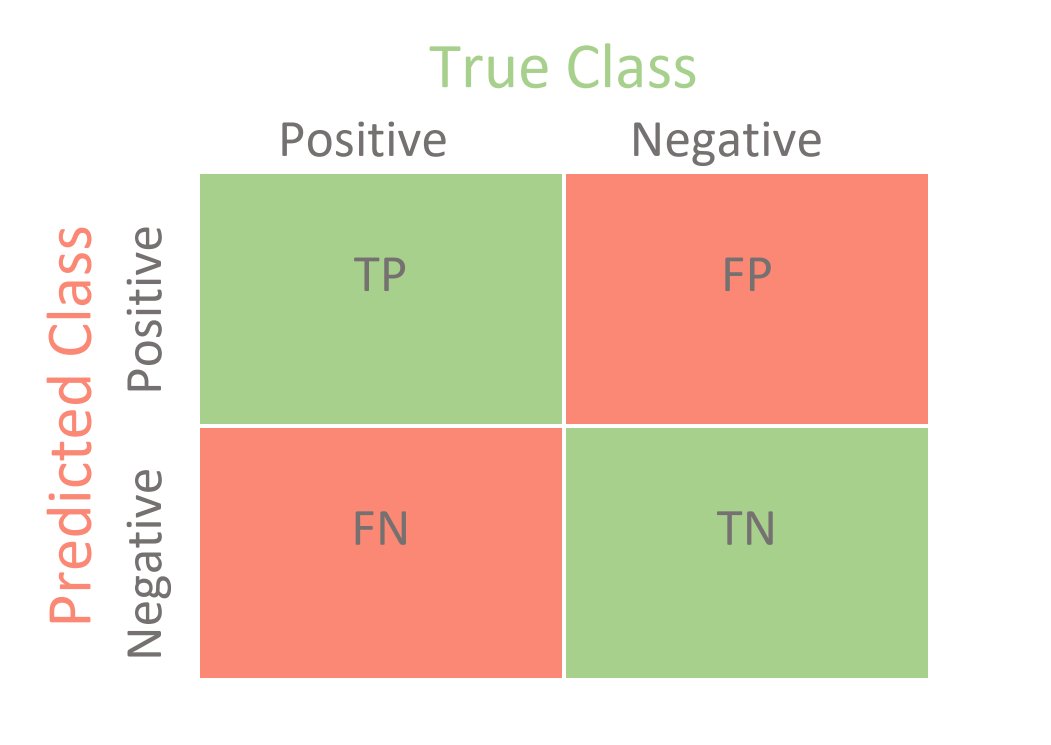


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       377
         1.0       0.82      0.82      0.82       268

    accuracy                           0.85       645
   macro avg       0.84      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [ ]:
confusion_matrix(ytest,ypred)

array([[327,  50],
       [ 47, 221]])

#### Hyper-Paramater Tuning

In [ ]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

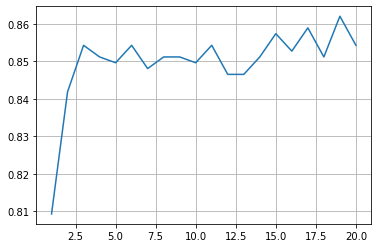

In [ ]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.862015503875969

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       377
         1.0       0.83      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
confusion_matrix(ytest,ypred)

array([[331,  46],
       [ 43, 225]])

## **Cross Validation Score**
Cross-validation provides information about how well a classifier generalizes, specifically the range of expected errors of the classifier. 

In [ ]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.75813953 0.76046512 0.78372093 0.76689977 0.78554779]
CVS Mean: 0.7709546267685803
CVS Standard Deviation: 0.01154674920635349


## **Bagging** 
Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.8604651162790697

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       377
         1.0       0.83      0.83      0.83       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
confusion_matrix(ytest,ypred)

array([[333,  44],
       [ 46, 222]])

# **3.2 Logistic Regression :**
 

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.
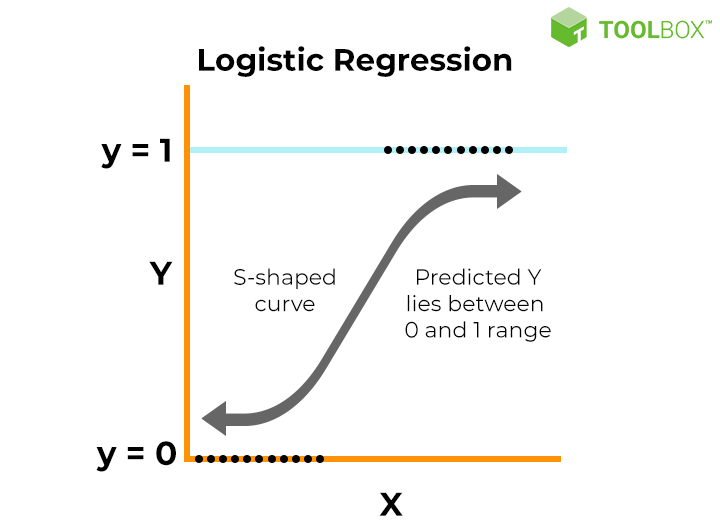

##  **Assumptions of Logistic Regression :**
*   The dependent/response variable is binary or dichotomous
*   Little or no multicollinearity between the predictor/explanatory variables
*   Linear relationship of independent variables to log odds
*   Prefers large sample size
*   Problem with extreme outliers
*   Consider independent observations







In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.86      0.85       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
accuracy_score(ytest,ypred)

0.8573643410852713

In [ ]:
confusion_matrix(ytest,ypred)

array([[327,  50],
       [ 42, 226]])

## Hyper-Parameter Tuning : Grid Search

Grid Search runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters

In [ ]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.570 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.570 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

0.8815570321151718

In [ ]:
grid.best_estimator_

LogisticRegression(C=1000.0, solver='liblinear')

In [ ]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       377
         1.0       0.81      0.84      0.82       268

    accuracy                           0.85       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [ ]:
accuracy_score(ytest,ypred)

0.8511627906976744

In [ ]:
confusion_matrix(ytest,ypred)

array([[324,  53],
       [ 43, 225]])

#### Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.86046512 0.89534884 0.86511628 0.84848485 0.86480186]
CVS Mean: 0.8668433891689705
CVS Standard Deviation: 0.01547533314746355


#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       377
         1.0       0.81      0.84      0.82       268

    accuracy                           0.85       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.85      0.85      0.85       645



In [ ]:
accuracy_score(ytest,ypred)

0.8511627906976744

In [ ]:
confusion_matrix(ytest,ypred)

array([[323,  54],
       [ 42, 226]])

#**3.3 Naive Bayes:** 




####Naive Bayes is a basic but effective probabilistic classification model in machine learning that draws influence from Bayes Theorem. Naive Bayes is a generative model. (Gaussian) Naive Bayes assumes that each class follow a Gaussian distribution. 
####I am implementing the Gaussian Naive Bayes classifier, This classifier is employed when the predictor values are continuous and are expected to follow a Gaussian distribution.

## **Assumptions of Naive Bayes:** 

*   No pair of features are dependent. - The independence Assumption
*   Each feature is given the same weight(or importance). - The Equality/Identical Assumption




In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       377
         1.0       0.80      0.84      0.82       268

    accuracy                           0.84       645
   macro avg       0.84      0.84      0.84       645
weighted avg       0.85      0.84      0.85       645



In [ ]:
accuracy_score(ytest,ypred)

0.8449612403100775

In [ ]:
confusion_matrix(ytest,ypred)

array([[319,  58],
       [ 42, 226]])

#### Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.80930233 0.81395349 0.80697674 0.79254079 0.83682984]
CVS Mean: 0.8119206375020329
CVS Standard Deviation: 0.014362985225693792


#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       377
         1.0       0.80      0.85      0.82       268

    accuracy                           0.85       645
   macro avg       0.84      0.85      0.84       645
weighted avg       0.85      0.85      0.85       645



In [ ]:
accuracy_score(ytest,ypred)

0.8480620155038759

In [ ]:
confusion_matrix(ytest,ypred)

array([[319,  58],
       [ 40, 228]])

#**3.4 Decision tree** 


Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

## **Asumptions in Decision Tree :** we have no probabilistic model, but just binary split, we don’t need to make any assumption at all

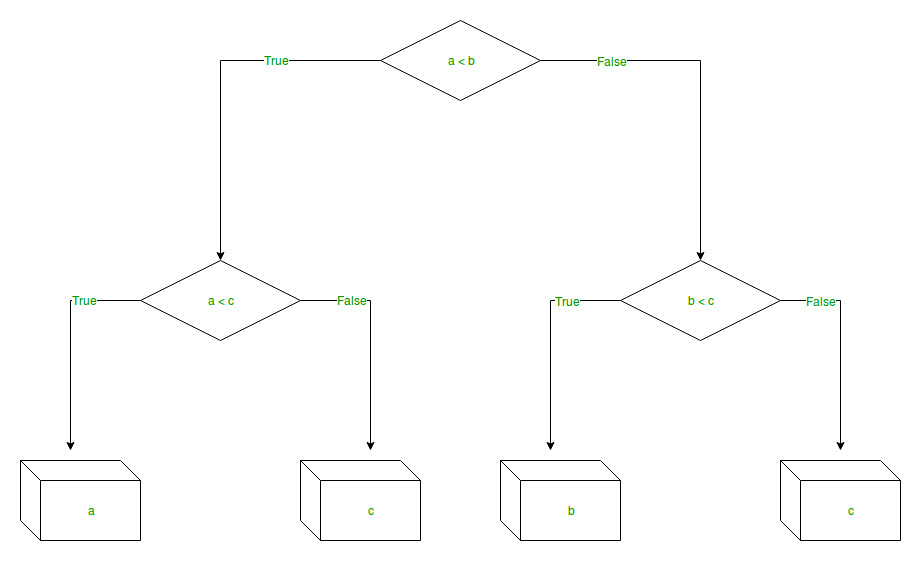

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       377
         1.0       0.74      0.79      0.77       268

    accuracy                           0.80       645
   macro avg       0.80      0.80      0.80       645
weighted avg       0.80      0.80      0.80       645



In [ ]:
accuracy_score(ytest,ypred)

0.8015503875968992

In [ ]:
confusion_matrix(ytest,ypred)

array([[304,  73],
       [ 55, 213]])

##Hyper-Parameter Tuning :
The function to measure the quality of a split. Supported criteria are “**gini**” for the Gini impurity and “**entropy**” for the information gain

Criterion-->"GINI"

In [ ]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8589147286821706 4


In [ ]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8558139534883721 12


Criterion-->"ENTROPY"

In [ ]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8527131782945736 4


In [ ]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8589147286821706 14


###### Summary
Criterion-"GINI"
    - Max depth tuning:86.20%,
    - Min samples leaf tuning:85.74%
    
 
Criterion-"ENTROPY"
    - Max depth tuning:85.11%,
    - Min samples leaf tuning:85.89%

In [ ]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
accuracy_score(ytest,ypred)

0.8573643410852713

In [ ]:
confusion_matrix(ytest,ypred)

array([[329,  48],
       [ 44, 224]])

#### Tree

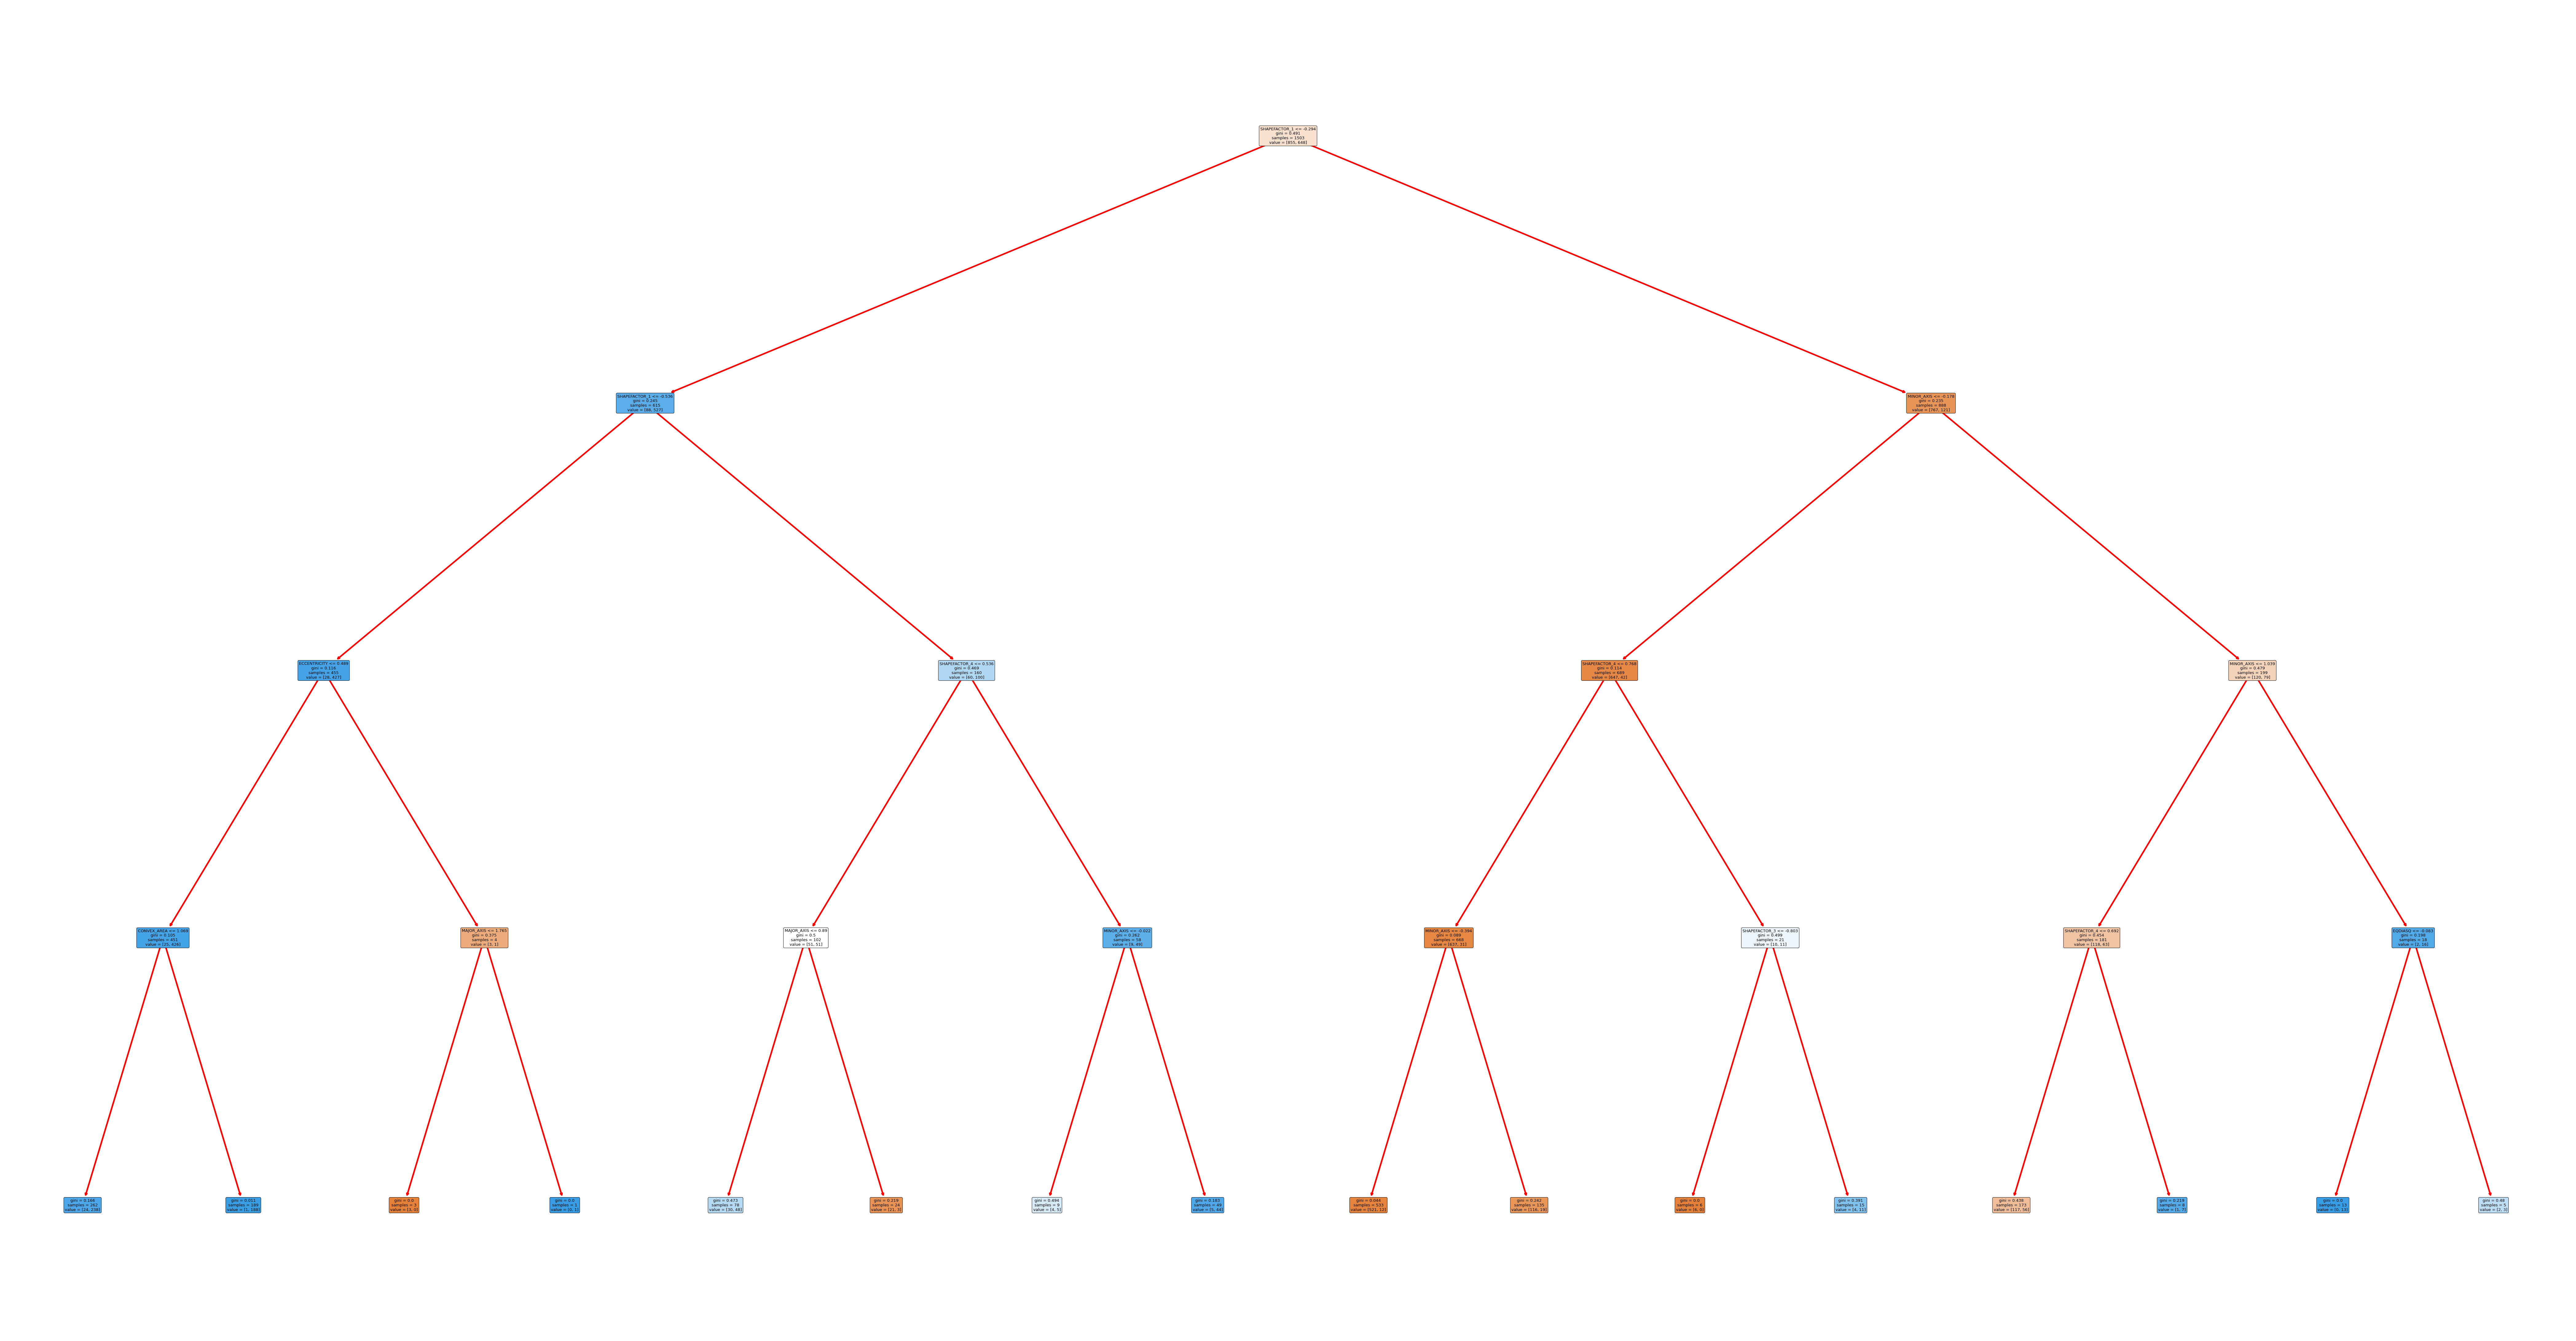

In [ ]:
fig, ax= plt.subplots(figsize=(150,80))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(5)

#### Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8627907  0.85813953 0.84186047 0.83449883 0.86013986]
CVS Mean: 0.8514858784626226
CVS Standard Deviation: 0.011208654912762852


#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       377
         1.0       0.82      0.87      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.86       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8651162790697674

In [ ]:
confusion_matrix(ytest,ypred)

array([[325,  52],
       [ 35, 233]])

# **3.5 Random Forest**

**Random Forest Regression** is a supervised learning algorithm that uses **ensemble learning** method for regression. **Ensemble learning** method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

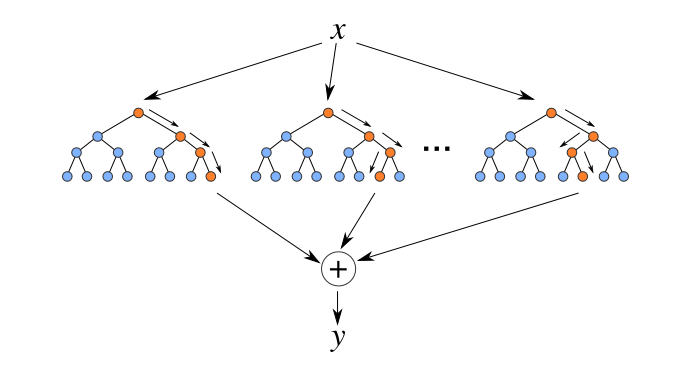

A Random Forest Regression model is powerful and accurate. It usually performs great on many problems, including features with non-linear relationships. Disadvantages, however, include the following: 


*   there is no interpretability
*   overfitting may easily occur, we must choose the number of trees to include in the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       377
         1.0       0.82      0.85      0.84       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
accuracy_score(ytest,ypred)

0.8635658914728682

In [ ]:
confusion_matrix(ytest,ypred)

array([[328,  49],
       [ 39, 229]])

#### Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.86976744 0.86976744 0.8627907  0.84848485 0.86946387]
CVS Mean: 0.8640548598688135
CVS Standard Deviation: 0.008228583491374775


#**3.6 Support Vector Classifier**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

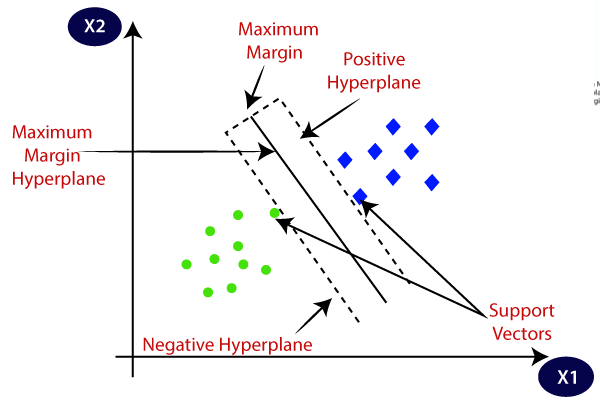

####**Support vector classifier assumptions:**
The margin should be as large as possible.

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       377
         1.0       0.84      0.85      0.85       268

    accuracy                           0.87       645
   macro avg       0.87      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
confusion_matrix(ytest,ypred)

array([[334,  43],
       [ 40, 228]])

In [ ]:
accuracy_score(ytest,ypred)

0.8713178294573644

In [ ]:
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       377
         1.0       0.82      0.84      0.83       268

    accuracy                           0.86       645
   macro avg       0.85      0.85      0.85       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
accuracy_score(ytest,ypred)

0.8558139534883721

In [ ]:
confusion_matrix(ytest,ypred)

array([[326,  51],
       [ 42, 226]])

#### Hyper-Parameter Tuning

In [ ]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.1s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.1s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.568 total time=   0.1s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.570 total time=   0.1s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.570 total time=   0.1s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.827 total time=   0.1s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.887 total time=   0.1s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.837 total time=   0.1s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.847 total time=   0.1s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.857 total time=   0.1s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.880 total time=   0.1s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_score_

0.8788947951273531

In [ ]:
grid.best_params_

{'C': 10.0, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10.0)

In [ ]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       377
         1.0       0.83      0.86      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.86       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8666666666666667

In [ ]:
confusion_matrix(ytest,ypred)

array([[329,  48],
       [ 38, 230]])

#### Cross Validation Score

In [ ]:
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.74418605 0.78837209 0.81627907 0.75058275 0.78787879]
CVS Mean: 0.7774597495527729
CVS Standard Deviation: 0.026698642696926195


#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       377
         1.0       0.84      0.86      0.85       268

    accuracy                           0.87       645
   macro avg       0.87      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8713178294573644

In [ ]:
confusion_matrix(ytest,ypred)

array([[332,  45],
       [ 38, 230]])

#**3.7 Voting Classifier**

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting

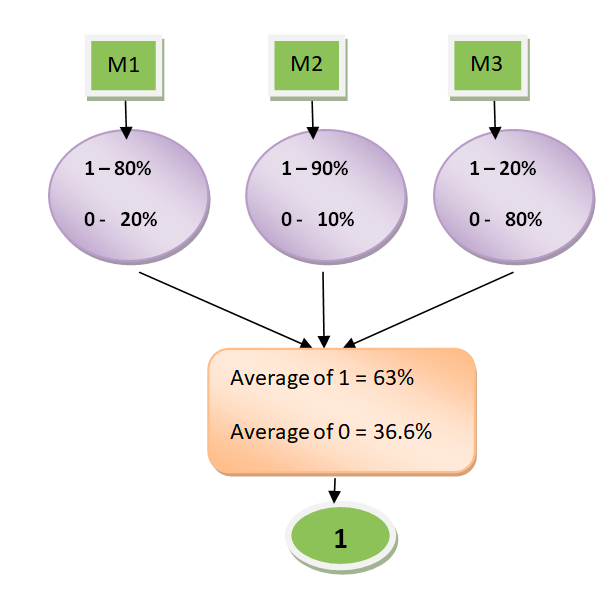

In [ ]:
models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))

In [ ]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       377
         1.0       0.83      0.83      0.83       268

    accuracy                           0.86       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.86      0.86      0.86       645



In [ ]:
accuracy_score(ytest,ypred)

0.8604651162790697

In [ ]:
confusion_matrix(ytest,ypred)

array([[333,  44],
       [ 46, 222]])

#**3.8 Boosting**

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors.

###### Ada Boosting : Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       377
         1.0       0.83      0.85      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8651162790697674

In [ ]:
confusion_matrix(ytest,ypred)

array([[330,  47],
       [ 40, 228]])

###### Gradient Boosting: Gradient Boosting (GB) is similar to AdaBoost in that it, too, is a sequential training technique. The difference between AdaBoost and GB is that GB does not give incorrectly classified items more weight. Instead, GB software optimizes the loss function by generating base learners sequentially so that the present base learner is always more effective than the previous one

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       377
         1.0       0.81      0.88      0.85       268

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8682170542635659

In [ ]:
confusion_matrix(ytest,ypred)

array([[323,  54],
       [ 31, 237]])

###### XG Boosting: Extreme Gradient Boosting (XGBoost) improves gradient boosting for computational speed and scale in several ways. XGBoost uses multiple cores on the CPU so that learning can occur in parallel during training.

In [ ]:
from xgboost import XGBClassifier
xbc=XGBClassifier()
xbc.fit(xtrain,ytrain)
ypred=xbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       377
         1.0       0.82      0.88      0.85       268

    accuracy                           0.87       645
   macro avg       0.87      0.87      0.87       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8713178294573644

In [ ]:
confusion_matrix(ytest,ypred)

array([[325,  52],
       [ 31, 237]])

#**3.9 Deep Learning - Artificial Neural Network**

##**Neural Network assumptions:**


*   Artificial Neurons are arranged in layers, which are sequentially arranged
*   Neurons within the same layer do not interact or communicate to each other
*   All inputs enter into the network through the input layer and passes through the output layer
*   All hidden layers at same level should have same activation function
*   Artificial neuron at consecutive layers are densely connected
*   Every inter-connected neural network has it’s own weight and biased associated with it






In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest))

Epoch 1/1000
16/16 [==============================] - 1s 21ms/step - loss: 0.6370 - accuracy: 0.6959 - val_loss: 0.5919 - val_accuracy: 0.7705
Epoch 2/1000
16/16 [==============================] - 0s 8ms/step - loss: 0.5715 - accuracy: 0.7951 - val_loss: 0.5364 - val_accuracy: 0.8140
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5147 - accuracy: 0.8290 - val_loss: 0.4856 - val_accuracy: 0.8326
Epoch 4/1000
16/16 [==============================] - 0s 7ms/step - loss: 0.4630 - accuracy: 0.8403 - val_loss: 0.4403 - val_accuracy: 0.8388
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4194 - accuracy: 0.8456 - val_loss: 0.4051 - val_accuracy: 0.8527
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.8550 - val_loss: 0.3796 - val_accuracy: 0.8543
Epoch 7/1000
16/16 [==============================] - 0s 7ms/step - loss: 0.3601 - accuracy: 0.8576 - val_loss: 0.3630 - val_accuracy: 0.8527
Epoch

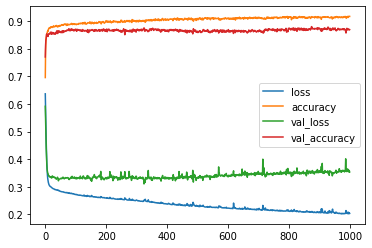

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [ ]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=50)

In [ ]:
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/1000
16/16 [==============================] - 1s 15ms/step - loss: 0.6672 - accuracy: 0.4724 - val_loss: 0.6412 - val_accuracy: 0.5504
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.6460 - val_loss: 0.5917 - val_accuracy: 0.6930
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7671 - val_loss: 0.5700 - val_accuracy: 0.7736
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.8210 - val_loss: 0.5587 - val_accuracy: 0.8109
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5285 - accuracy: 0.8423 - val_loss: 0.5515 - val_accuracy: 0.8155
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.8543 - val_loss: 0.5428 - val_accuracy: 0.8248
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.5049 - accuracy: 0.8643 - val_loss: 0.5310 - val_accuracy: 0.8341
Epoch

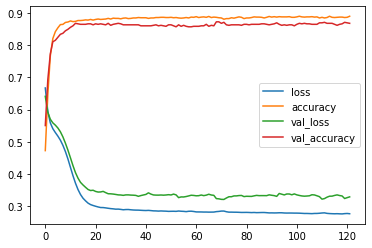

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
ann=Sequential()

ann.add(Dense(units=16,activation="relu"))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=8,activation="relu"))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [ ]:
ann.fit(xtrain,ytrain,epochs=1000,batch_size=100,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/1000
16/16 [==============================] - 2s 44ms/step - loss: 0.9435 - accuracy: 0.4691 - val_loss: 0.7326 - val_accuracy: 0.4884
Epoch 2/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.7181 - accuracy: 0.5476 - val_loss: 0.5872 - val_accuracy: 0.6713
Epoch 3/1000
16/16 [==============================] - 0s 20ms/step - loss: 0.6067 - accuracy: 0.6547 - val_loss: 0.5189 - val_accuracy: 0.7969
Epoch 4/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.5438 - accuracy: 0.7265 - val_loss: 0.4827 - val_accuracy: 0.8264
Epoch 5/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.5074 - accuracy: 0.7552 - val_loss: 0.4592 - val_accuracy: 0.8372
Epoch 6/1000
16/16 [==============================] - 0s 16ms/step - loss: 0.4838 - accuracy: 0.7911 - val_loss: 0.4430 - val_accuracy: 0.8434
Epoch 7/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.4585 - accuracy: 0.8157 - val_loss: 0.4274 - val_accuracy: 0.8450

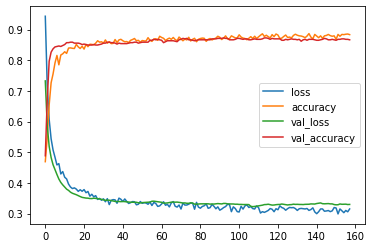

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [ ]:
ypred=ann.predict(xtest)

In [ ]:
ypred=ypred>0.5

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       377
         1.0       0.83      0.85      0.84       268

    accuracy                           0.87       645
   macro avg       0.86      0.86      0.86       645
weighted avg       0.87      0.87      0.87       645



In [ ]:
accuracy_score(ytest,ypred)

0.8666666666666667

In [ ]:
confusion_matrix(ytest,ypred)

array([[332,  45],
       [ 41, 227]])

# SUMMARY

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 84.96%,
    - Accuracy Post Hyper-parameter Tuning: 86.20%,
    - Cross Validation Score: 77.09%,
    - Bagging Accuracy: 84.96%,
    - Best Accuracy Achieved: 84.96%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 85.73%,
    - Accuracy Post Hyper-parameter Tuning: 88.15%,
    - Cross Validation Score: 86.68%,
    - Bagging Accuracy: 85.11%,
    - Best Accuracy Achieved: 88.15%

        
Model name: Naive Bayes
    - Initial Accuracy: 84.49%,
    - Cross Validation Score: 81.65%,
    - Bagging Accuracy: 84.65%,    
    - Best Accuracy Achieved: 84.65%

        
Model name: Decision Tree
    - Initial Accuracy: 78.75%,
    - Accuracy Post Hyper-parameter Tuning: 85.89%,
        Criterion Gini:
            Max Depth best Accuracy- 85.89%,
            Min Samples Leaf best Accuracy- 85.73%,
        Criterion Entropy:
            Max Depth best Accuracy- 85.11%,
            Min Samples Leaf best Accuracy- 85.89%,
    - Cross Validation Score: 85.33%,
    - Bagging Accuracy: 85.89%,
    - Best Accuracy Achieved: 85.89%

        
Model name: Random Forest
    - Initial Accuracy: 85.27%,
    - Cross Validation Score: 86.59%,
    - Best Accuracy Achieved: 96.25%
        

Model name: Support Vector Classifier
    - Initial Accuracy: 
        Kernel "rbf"- 87.13%,
        Kernel "linear"- 85.58%,
    - Accuracy Post Hyper-parameter Tuning: 86.66%,
    - Cross Validation Score: 77.74%,
    - Bagging Accuracy: 87.90%,
    - Best Accuracy Achieved: 87.90%
        
        
Voting Classifier Accuracy: 86.04%


Boosting:
    - Ada Boosting: 86.51%,
    - Gradient Boosting: 85.58%,
    - XG Boosting: 87.13%,
    
    
Deep Learning- Artificial Neural Network
    - Best Accuracy: 86.36%

In [ ]:
!pip freeze

absl-py==1.2.0
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.6.15
cffi==1.15.1
cftime==1.6.1
chardet==3.0.4
charset-normalizer==2.1.0
click==7.1.2
clikit==0.6.2
cloudpickle==1.3.0
cmake==3.22.5
cmdstanpy==1.0.4
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy=